In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Done")

Done


In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')

df.head(10)

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333
5,22.9,30.6,17.4,51.0,0.0,6.9,3.5,3.5,200.645833
6,22.3,30.1,15.7,43.0,0.0,6.9,2.8,5.4,285.225000
7,21.8,30.6,14.8,41.0,0.0,6.9,1.9,5.4,334.341176
8,21.6,30.6,14.2,43.0,0.0,6.9,3.1,7.6,276.908333
9,21.6,29.6,16.4,58.0,0.0,6.9,2.2,3.5,108.000000


In [ ]:
df.dtypes

T         float64
TM        float64
Tm        float64
H         float64
PP        float64
VV        float64
V         float64
VM        float64
PM_2_5    float64
dtype: object

In [ ]:
df.shape

(522, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       522 non-null    float64
 1   TM      522 non-null    float64
 2   Tm      522 non-null    float64
 3   H       522 non-null    float64
 4   PP      522 non-null    float64
 5   VV      522 non-null    float64
 6   V       522 non-null    float64
 7   VM      522 non-null    float64
 8   PM_2_5  522 non-null    float64
dtypes: float64(9)
memory usage: 36.8 KB


In [ ]:
df.isna().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM_2_5    0
dtype: int64

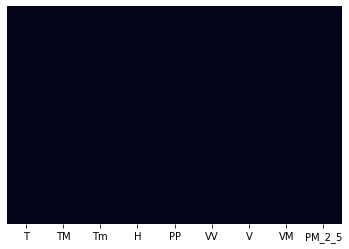

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
df['PM_2_5'].value_counts()

79.000000     3
37.625000     2
30.666667     2
43.041667     2
30.625000     2
             ..
86.375000     1
19.833333     1
42.291667     1
41.583333     1
108.000000    1
Name: PM_2_5, Length: 504, dtype: int64

In [ ]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
T,1.000000,0.886066,0.754669,-0.485987,-0.066337,0.265192,0.037140,0.038449,-0.408419
TM,0.886066,1.000000,0.486710,-0.667174,-0.045421,0.263024,-0.134021,-0.089428,-0.251422
Tm,0.754669,0.486710,1.000000,0.120643,0.024127,0.034922,0.271600,0.248564,-0.514636
H,-0.485987,-0.667174,0.120643,1.000000,0.270014,-0.303661,0.278017,0.257704,-0.128596
PP,-0.066337,-0.045421,0.024127,0.270014,1.000000,-0.068208,-0.091420,-0.050060,-0.126596
VV,0.265192,0.263024,0.034922,-0.303661,-0.068208,1.000000,-0.008328,-0.041237,-0.119884
V,0.037140,-0.134021,0.271600,0.278017,-0.091420,-0.008328,1.000000,0.842111,-0.371244
VM,0.038449,-0.089428,0.248564,0.257704,-0.050060,-0.041237,0.842111,1.000000,-0.346540
PM_2_5,-0.408419,-0.251422,-0.514636,-0.128596,-0.126596,-0.119884,-0.371244,-0.346540,1.000000


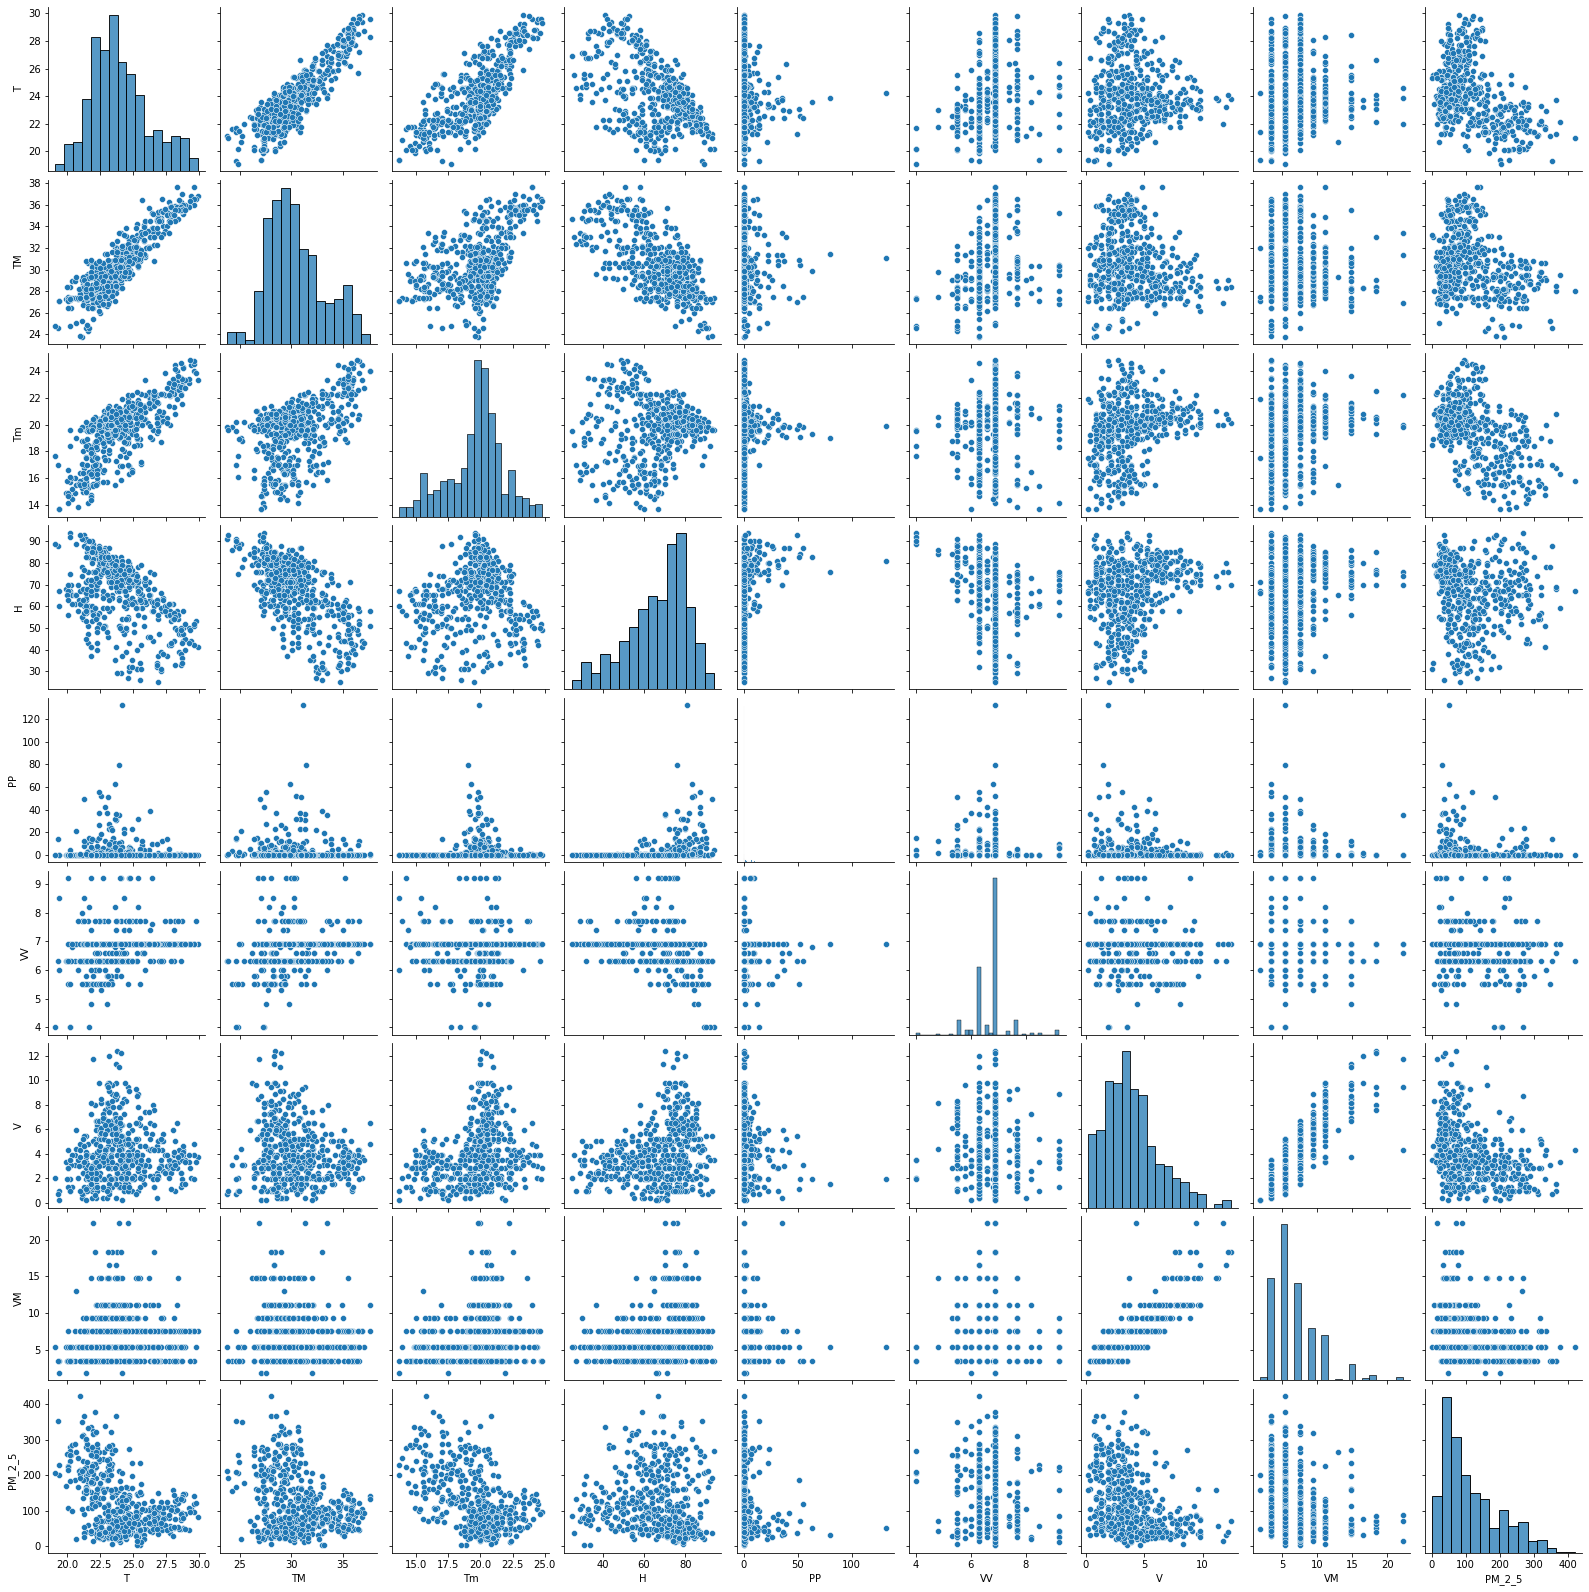

In [ ]:
sns.pairplot(df)

In [ ]:
#Correlation Matrix with Heatmap
#Correlation states how the features are related to each other or the target variable.

#Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

#Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

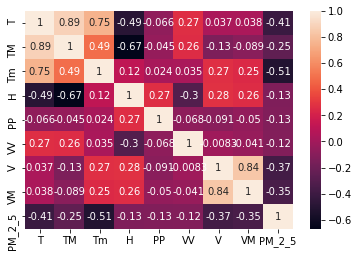

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

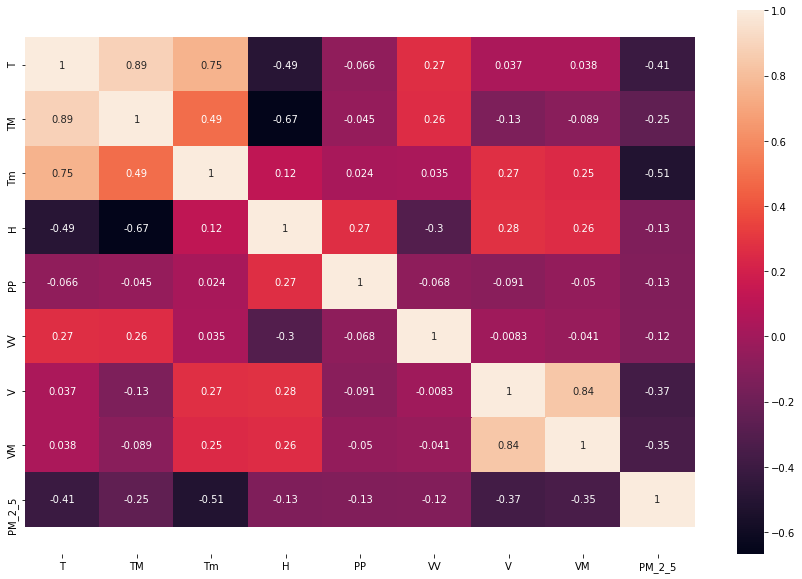

In [ ]:
# need this since due to bug in current version of matplotlib and seaborn
# top and bottom rows are cut in half
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [ ]:
X = df.iloc[:, :-1] ## independent features
y = df.iloc[:, -1] ## dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#R^2 is the goodness of fit measured, the percentage of the variance in the dependent variable by independent variable

In [ ]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'

'Coefficient of determination R^2 on train set 0.40130070313506305'

In [ ]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.3202915645310601'

In [ ]:
#Mean change in the response variable on predictor variable

In [ ]:
lin_reg.coef_

array([-15.84230876,  -0.72209799,  -2.51152075,  -1.38818232,
        -0.84155463,  -9.35371295, -11.32087403,   0.5496871 ])

In [ ]:
lin_reg.intercept_

763.0768032875105

In [ ]:
#Cross validation : technique used to test the effectiveness of a machine learning model

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [ ]:
score.mean()

0.283859802957589

In [ ]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-15.842309
TM,-0.722098
Tm,-2.511521
H,-1.388182
PP,-0.841555
VV,-9.353713
V,-11.320874
VM,0.549687


In [ ]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in T is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in TM is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in Tm is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in H is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in PP is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VV is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in V is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VM is associated with increase of val in AQI PM2.5


In [ ]:
pred = lin_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


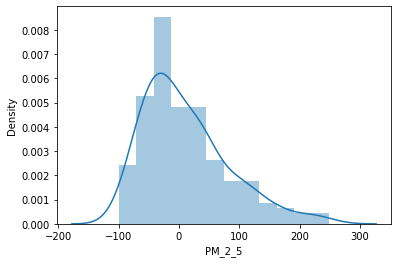

In [ ]:
sns.distplot(y_test - pred)

In [ ]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 55.12183806894885
Mean Sq Error: 5157.172338744652
Root Mean Error: 71.81345513721402


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


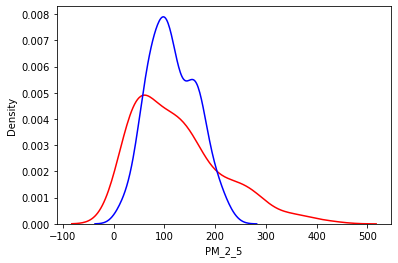

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)